In [53]:
# import standard libraries
#!pip install autograd
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys

# import our libraries
import bayes_helpers as bh
from utils import generate_data
from utils import run_toy_nn
from feed_forward import Feedforward
from nlm import NLM

from optimizers import *

In [46]:
# Import the data
df = pd.read_csv("HW8_data.csv")
x_train = np.array(df["x"])
y_train = np.array(df["y"])

# Create a test set
x_test = np.linspace(x_train.min()-1,x_train.max()+1,200)

x_train = x_train.reshape((1, -1))
y_train = y_train.reshape((1, -1))
x_test = x_test.reshape((1, -1))

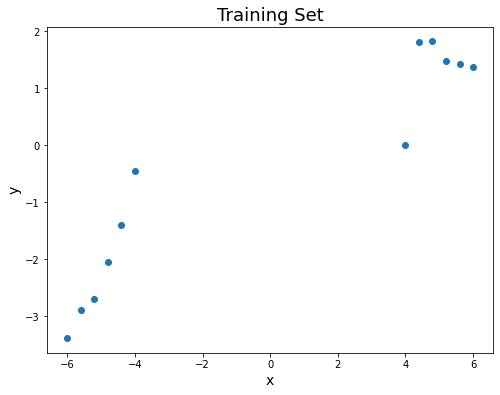

In [47]:
# Create a plot of the training set
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set', fontsize = 18);

### Test optimizers with FeedForward

In [89]:
# Define the relu activation function
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


# Define the neural network model parameters
width = 100
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

### Steepest Descent

In [90]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 5000,
          'optimizer': steepest_descent}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

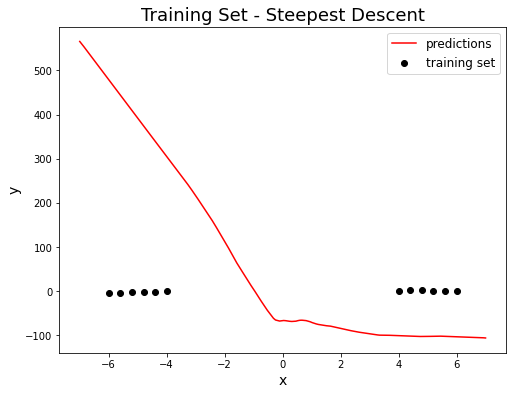

In [91]:
# Create a plot of the training set
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - Steepest Descent', fontsize = 18)
ax.legend(fontsize=12);

### Newton's Method

In [96]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 5000,
          'optimizer': newton_method}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

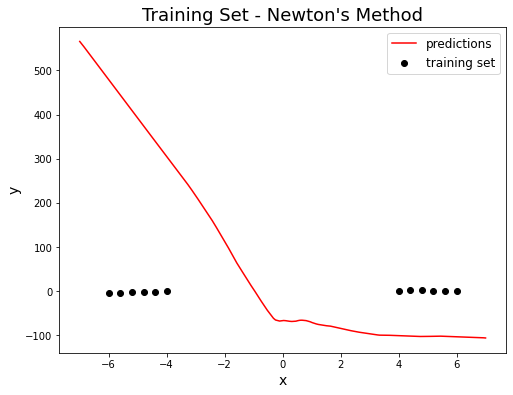

In [98]:
# Create a plot of the training set
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - Newton\'s Method', fontsize = 18)
ax.legend(fontsize=12);

### BFGS

In [92]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 5000,
          'optimizer': BFGS}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

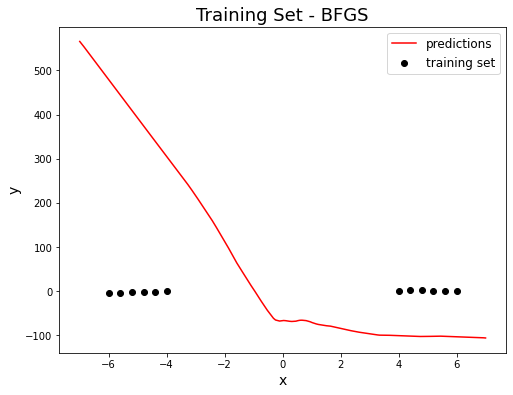

In [93]:
# Create a plot of the training set
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - BFGS', fontsize = 18)
ax.legend(fontsize=12);

### Conjugate Gradient

In [94]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 5000,
          'optimizer': conjugate_gradient}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

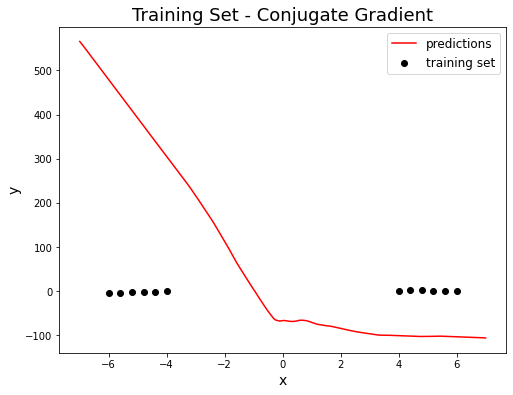

In [95]:
# Create a plot of the training set
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - Conjugate Gradient', fontsize = 18)
ax.legend(fontsize=12);

### Test optimizers with NLM

In [99]:
import bayes_helpers as bh

In [100]:
# Define the relu activation function
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


# Define the neural network model parameters
width = 100
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

In [101]:
# Set the prior variance
prior_var = 1.0
y_var = 2.0

# Initialize the NLM
nlm = NLM(prior_var, y_var, architecture, random_state = np.random.RandomState(0))

### Steepest Descent

In [103]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': steepest_descent}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)


Done Training


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

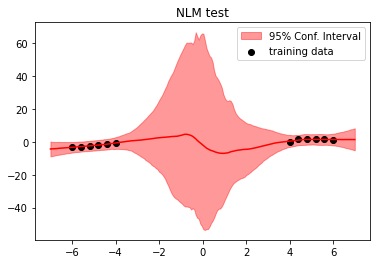

In [104]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")

### Newton's Method

In [105]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': newton_method}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)


Done Training


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

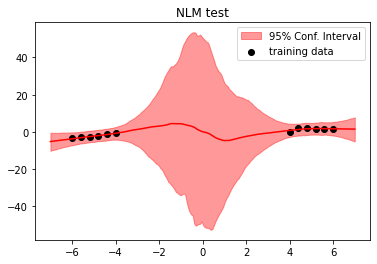

In [106]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")

### BFGS

In [107]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': BFGS}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)


Done Training


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

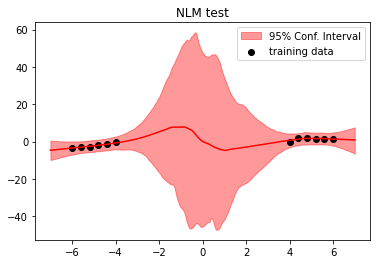

In [108]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")

### Conjugate Gradient

In [109]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': conjugate_gradient}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)


Done Training


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

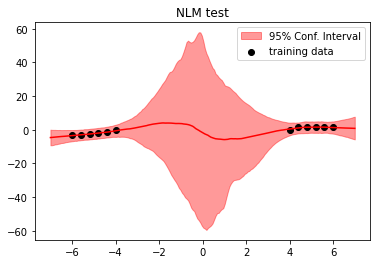

In [110]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")